In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/Reviews.csv")
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from wordcloud import WordCloud
combined_text="".join(data['Review'])

In [ ]:
wordcloud=WordCloud(width=800,height=400, background_color="white"). generate(combined_text)

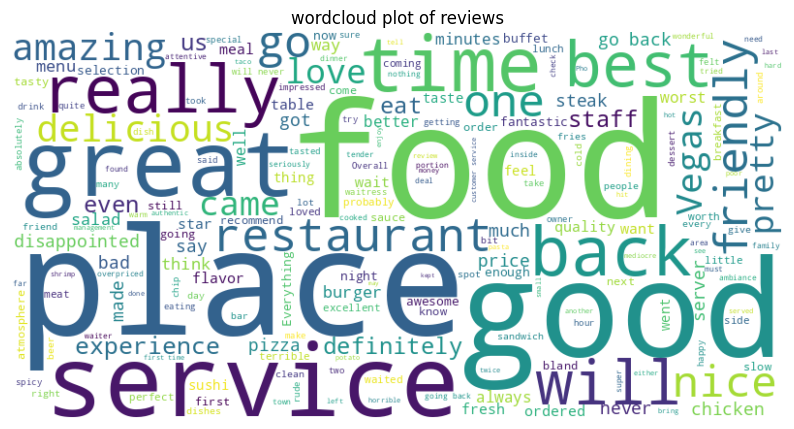

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud plot of reviews')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
targeted_words=['good','great','amazing','bad','not bad']
all_words="".join(data['Review']).lower().split()

In [ ]:
word_count=Counter(all_words)
target_words_count={word:word_count[word]for word in targeted_words}

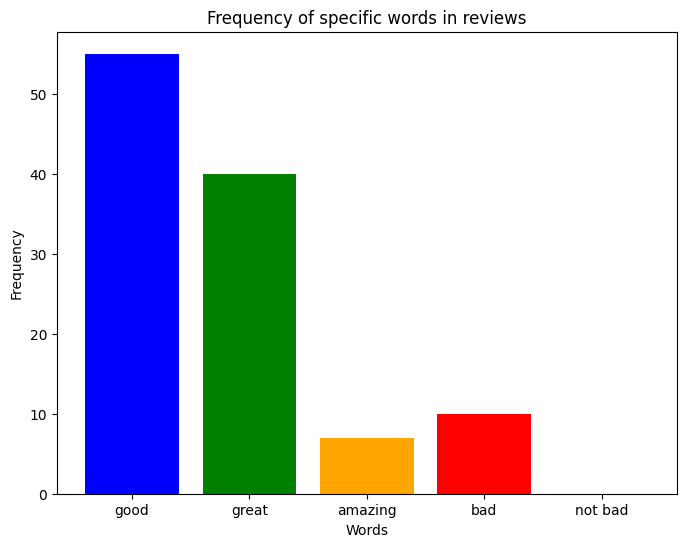

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(target_words_count.keys(),target_words_count.values(),color=['blue','green','orange','red','violet'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
print(x.toarray())
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '10' '100' ... 'yum' 'yummy' 'zero']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
y=data['Liked']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#print(x_train,x_test,y_train,y_test)
#print(y)

The accuracy is:  0.8
The classification report is: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200


Review Sentiment Analysis:
Positive Reviews: 46.00%
Negative Reviews: 54.00%

Restaurant is classified as: Bad


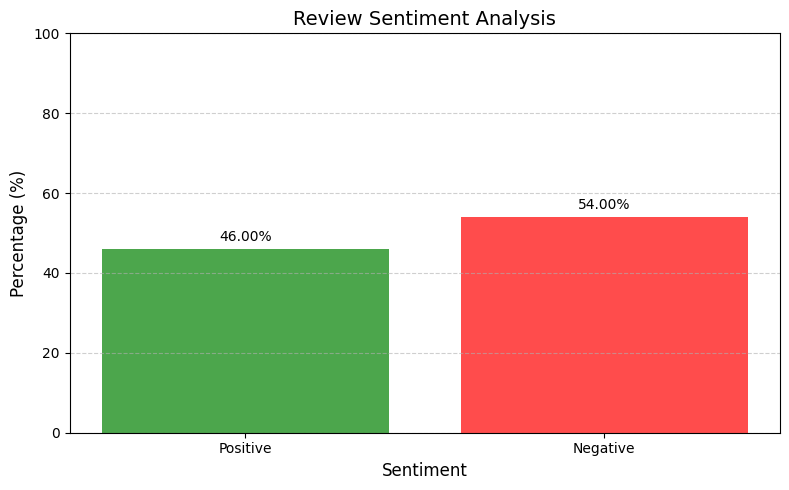

In [ ]:
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("The accuracy is: ",accuracy)
report=classification_report(y_test,y_pred)
print("The classification report is: ")
print(report)
positive_reviews = sum(y_pred == 1)
neutral_reviews = sum(y_pred == 0)
total_reviews = len(y_pred)
percentages = [
    positive_reviews / total_reviews * 100,
    neutral_reviews / total_reviews * 100
]

if percentages[0] > 70:
    restaurant_quality = "Good"
elif percentages[1] > 50:
    restaurant_quality = "Bad"
else:
    restaurant_quality = "Average"

print("\nReview Sentiment Analysis:")
print(f"Positive Reviews: {percentages[0]:.2f}%")
print(f"Negative Reviews: {percentages[1]:.2f}%")
print(f"\nRestaurant is classified as: {restaurant_quality}")

# Generate a bar graph
sentiments = ['Positive', 'Negative']

plt.figure(figsize=(8, 5))
plt.bar(sentiments, percentages, color=['green', 'red'], alpha=0.7)

# Add titles and labels
plt.title("Review Sentiment Analysis", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis covers 0% to 100%
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show the percentage values on the bars
for i, count in enumerate(percentages):
    plt.text(i, count + 2, f"{count:.2f}%", ha='center', fontsize=10)

# Display the graph
plt.tight_layout()
plt.show()

In [ ]:
def predict_review(review):
    # Define or import the preprocess_text function here
    # Example:
    def preprocess_text(text):
        # Implement your text preprocessing logic here
        return text.lower()

    cleaned_review = preprocess_text(review)
    review = vectorizer.transform([review])
    return model.predict(review)[0]


In [ ]:
new_review=[x for x in input("Enter a review: ").split(",")]
for review in new_review:
  sentiment=predict_review(review)
  sentiment_label="Positive" if sentiment==1 else "Negative"
  print(f"Review: {review}")
  print(f"Sentiment: {sentiment_label}")

Enter a review: the restaurant is amazing ,the food is good,the staff service is average,the ambiance should be better
Review: the restaurant is amazing 
Sentiment: Positive
Review: the food is good
Sentiment: Positive
Review: the staff service is average
Sentiment: Negative
Review: the ambiance should be better
Sentiment: Negative



Sentiment Analysis Results:
Positive Reviews: 47.80%
Negative Reviews: 52.20%

The restaurant is classified as: Bad


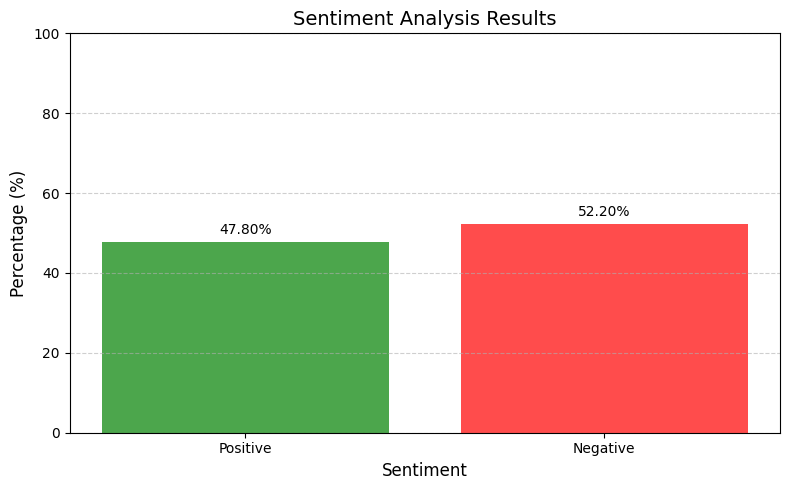


Predictions saved to: /mnt/data/New_Data_with_Sentiments.xlsx


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import os

# Helper function to clean text
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

# Function to load data (handles both .csv and .xlsx files)
def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format. Please upload either a CSV or an Excel file.")

# Function to check if review column exists
def get_review_column(data):
    review_columns = ['Review', 'review', 'Text', 'text', 'feedback']
    for column in review_columns:
        if column in data.columns:
            return column
    return None

# Function to preprocess labels for 0,1 sentiment
def preprocess_labels(y):
    # Directly map 0 to 'negative' and 1 to 'positive'
    y = y.map({0: 'negative', 1: 'positive'})
    return y

# Load the training data (you can update the path)
train_data_path = "/content/Reviews.csv"  # Path to your file
train_data = load_data(train_data_path)

# Check if the training data contains a 'Liked' label column
if 'Liked' in train_data.columns:
    # Preprocess the labels (0 = negative, 1 = positive)
    y_train = preprocess_labels(train_data['Liked'])
    review_column = get_review_column(train_data)

    # Clean the review column
    train_data[review_column] = train_data[review_column].astype(str).apply(clean_text)
    x_train = TfidfVectorizer().fit_transform(train_data[review_column])

    # Train the model with the labeled data
    model = MultinomialNB()
    model.fit(x_train, y_train)

    # Save the vectorizer used for training
    vectorizer = TfidfVectorizer()
    vectorizer.fit(train_data[review_column])
else:
    # If no labels, create a model for unsupervised sentiment prediction later
    model = None

# Load the new dataset (dynamic based on file type)
new_data_path = "/content/Reviews.xlsx"  # Path to your file
new_data = load_data(new_data_path)

# Attempt to find review column in new data
review_column = get_review_column(new_data)

if review_column is None:
    print("No review-like column found in the dataset. Please check the dataset structure.")
else:
    # Clean the new dataset's review column
    new_data[review_column] = new_data[review_column].astype(str).apply(clean_text)

    # Remove null values
    new_data = new_data.dropna(subset=[review_column])

    # Perform sentiment analysis if the model is trained
    if model:
        # Transform the new data using the same vectorizer as the training data
        x_new = vectorizer.transform(new_data[review_column])
        y_new_pred = model.predict(x_new)

        # Convert predictions back to text labels (negative, positive)
        new_data['Predicted Sentiment'] = ['positive' if pred == 'positive' else 'negative' for pred in y_new_pred]
    else:
        print("No model available for prediction, as no labels were provided during training.")

    # Calculate sentiment percentages
    positive_reviews = sum(y_new_pred == 'positive')
    negative_reviews = sum(y_new_pred == 'negative')
    total_reviews = len(y_new_pred)

    percentages = [
        positive_reviews / total_reviews * 100,
        negative_reviews / total_reviews * 100
    ]

    # Classify the restaurant based on positive and negative percentages
    if percentages[0] > 70:
        restaurant_quality = "Good"
    elif percentages[1] > 50:
        restaurant_quality = "Bad"
    else:
        restaurant_quality = "Average"

    # Output results
    print("\nSentiment Analysis Results:")
    print(f"Positive Reviews: {percentages[0]:.2f}%")
    print(f"Negative Reviews: {percentages[1]:.2f}%")
    print(f"\nThe restaurant is classified as: {restaurant_quality}")


    # Visualize results
    sentiments = ['Positive', 'Negative']

    plt.figure(figsize=(8, 5))
    plt.bar(sentiments, percentages, color=['green', 'red'], alpha=0.7)

    # Add titles and labels
    plt.title("Sentiment Analysis Results", fontsize=14)
    plt.xlabel("Sentiment", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.ylim(0, 100)  # Ensure the y-axis covers 0% to 100%
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Show the percentage values on the bars
    for i, count in enumerate(percentages):
        plt.text(i, count + 2, f"{count:.2f}%", ha='center', fontsize=10)

    # Display the graph
    plt.tight_layout()
    plt.show()
    #Save the predictions to a new Excel file
    output_file = "/mnt/data/New_Data_with_Sentiments.xlsx"

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    new_data.to_excel(output_file, index=False)
    print(f"\nPredictions saved to: {output_file}")

